In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the training data into a pandas DataFrame
train_data = pd.read_csv('data.csv')


In [3]:
# Exploratory Data Analysis (EDA)
# Display the first few rows of the training data
print(train_data.head())

         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860

In [4]:
train_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

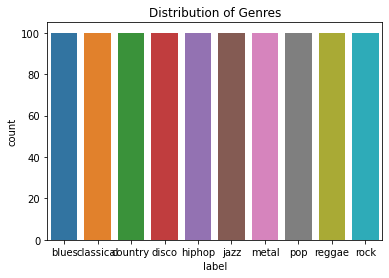

In [5]:
# Check the distribution of the target variable
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Genres')
plt.show()

In [6]:
# Define the mapping for label encoding
label_mapping = {'pop': 1, 'classical': 2}

In [7]:
# Assign labels for the remaining categories
remaining_categories = ['blues', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'reggae', 'rock']
for i, category in enumerate(remaining_categories, start=3):
    label_mapping[category] = i

In [8]:
# Encode the 'label' column
train_data['label_encoded'] = train_data['label'].map(label_mapping)

# Check the encoded labels
print(train_data[['label', 'label_encoded']])

     label  label_encoded
0    blues              3
1    blues              3
2    blues              3
3    blues              3
4    blues              3
..     ...            ...
995   rock             10
996   rock             10
997   rock             10
998   rock             10
999   rock             10

[1000 rows x 2 columns]


In [9]:
# Split the training data into features (X) and target variable (y)
X = train_data.drop(['label', 'filename', 'label_encoded'], axis=1)
y = train_data['label_encoded']

In [10]:
# Load the test data into a pandas DataFrame
test_data = pd.read_csv('data_2genre.csv')

In [13]:
# Split the test data into features (X_test) and target variable (y_test)
X_test = test_data.drop(['label', 'filename'], axis=1)
y_test = test_data['label']


In [14]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [15]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X, y)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.915
